In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
print(X_train.shape,Y_train.shape)
import numpy as np
np.unique(Y_train)

(60000, 28, 28) (60000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

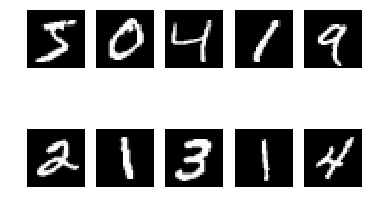

In [3]:
#显示实例图像
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i,:,:],cmap='gray')
    plt.axis('off')

In [4]:
img_rows,img_cols=28,28
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [5]:
#one_hot_encoding
from keras.utils import np_utils
n_classes=10
y_train=np_utils.to_categorical(Y_train,n_classes)
y_test=np_utils.to_categorical(Y_test,n_classes)

In [6]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import MaxPool2D,Dropout,Flatten
from keras.layers import Convolution2D
model=Sequential()
#第一层卷积层
n_filters=32
kernel_size=(3,3)
model.add(Convolution2D(n_filters,kernel_size,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
#第二层卷积层
n_filter=64
kernel_size=(5,5)
model.add(Convolution2D(n_filters,kernel_size,border_mode='same'))
model.add(Activation('relu'))
#第三层 全局最大池化层
pool_size=(2,2)
model.add(MaxPool2D(pool_size))
#第四层dropout 防止过拟合
model.add(Dropout(0.2))
#第五层flatten 拉平向量 连接卷积层与输出层
model.add(Flatten())
#输出层
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

D:\Users\Administrator\Anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
D:\Users\Administrator\Anaconda3\envs\Python3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), padding="same")`
  from ipykernel import kernelapp as app


In [7]:
#model.compile(loss="categorical_crossentropy",optimizer='adadelta',metrics=['accuracy'])

In [8]:
#model.fit(X_train,y_train,epochs=20,batch_size=128)

In [9]:
#model.evaluate(X_test,y_test)

In [10]:
#model.save('CNN_handwriteDigits.h5')
del model

In [11]:
model_load=keras.models.load_model('./CNN_handwriteDigits.h5')

In [12]:
import keras
print(keras.__version__)

2.2.4


In [13]:
model_load.evaluate(X_test,y_test)

10000/10000 [==============================] - 9s 912us/step


[0.03111009877594188, 0.9903]